In [3]:
import pandas as pd

# Load the dataset (replace 'dataset.csv' with your actual dataset file path or URL)
df = pd.read_csv("F:/Oasis Infobyte_internship/Customer Segmentation Analysis/ifood_df.csv")

# Display the first few rows to verify loading
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [8]:
# Check dataset structure
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values (example: fill 'Income' with median)
df['Income'] = df['Income'].fillna(df['Income'].median())

# Check for inconsistent data (e.g., negative purchase amounts)
df = df[df['MntWines'] >= 0]  # Adjust column names based on your dataset

# Remove duplicates
df = df.drop_duplicates()

# Verify cleaning
print("\nAfter Cleaning - First 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  Accepte

In [10]:
# Calculate total purchases (sum of different purchase types)
df['TotalPurchases'] = (df['NumDealsPurchases'] + df['NumWebPurchases'] + 
                        df['NumCatalogPurchases'] + df['NumStorePurchases'])

# Calculate total amount spent (sum of product category spends)
df['TotalAmountSpent'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + 
                          df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

# Calculate average purchase value
df['AveragePurchaseValue'] = df['TotalAmountSpent'] / df['TotalPurchases']

# Frequency of purchases (using total purchases as a proxy)
df['Frequency'] = df['TotalPurchases']

# Recency (assuming 'Recency' column exists as days since last purchase)
# If not available, you may need a timestamp column to calculate it

# Display summary statistics
print("\nDescriptive Statistics:")
print(df[['TotalPurchases', 'TotalAmountSpent', 'AveragePurchaseValue', 'Frequency', 'Recency']].describe())


Descriptive Statistics:
       TotalPurchases  TotalAmountSpent  AveragePurchaseValue    Frequency  \
count     2021.000000       2021.000000           2021.000000  2021.000000   
mean        14.897575        607.711034                   inf    14.897575   
std          7.598261        602.396167                   NaN     7.598261   
min          0.000000          5.000000              0.533333     0.000000   
25%          8.000000         69.000000              9.714286     8.000000   
50%         15.000000        397.000000             23.681818    15.000000   
75%         21.000000       1048.000000             45.640000    21.000000   
max         43.000000       2525.000000                   inf    43.000000   

           Recency  
count  2021.000000  
mean     48.880752  
std      28.950917  
min       0.000000  
25%      24.000000  
50%      49.000000  
75%      74.000000  
max      99.000000  


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = ['TotalAmountSpent', 'Frequency', 'Recency']
X = df[features]

# Standardize the data (to ensure equal feature weighting)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering (3 clusters as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the first few rows with cluster labels
print("\nData with Cluster Labels:")
print(df[['TotalAmountSpent', 'Frequency', 'Recency', 'Cluster']].head())


Data with Cluster Labels:
   TotalAmountSpent  Frequency  Recency  Cluster
0              1617         25       58        1
1                27          6       38        0
2               776         21       26        2
3                53          8       26        0
4               422         19       94        1


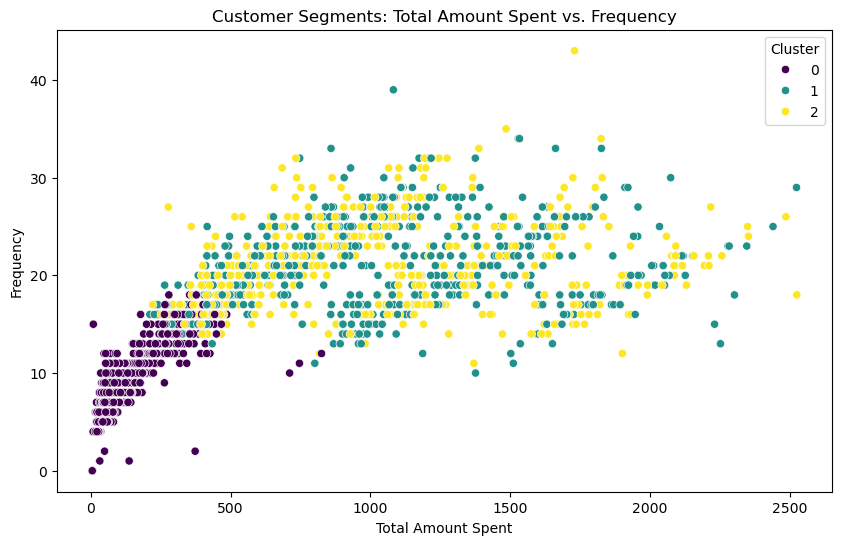

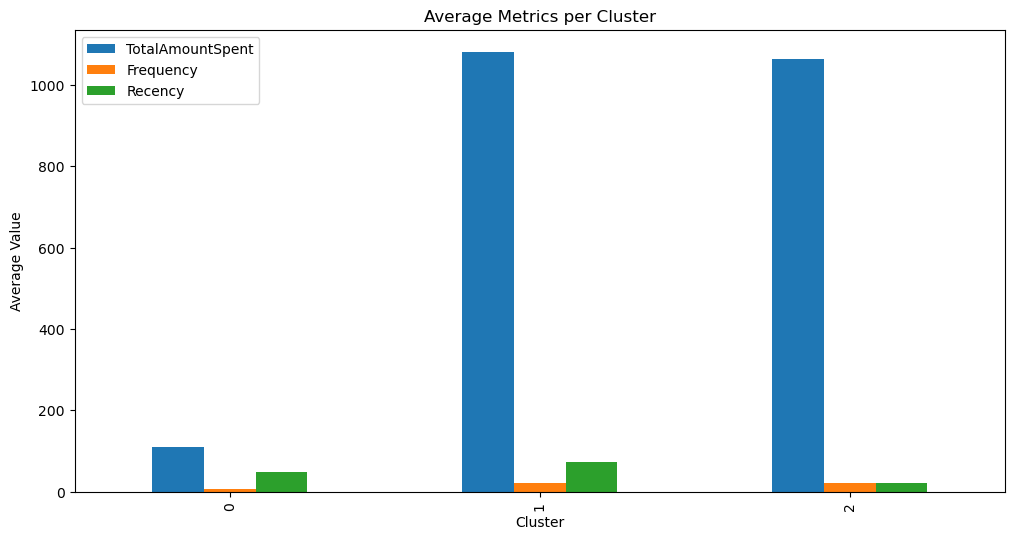

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Total Amount Spent vs. Frequency by Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalAmountSpent', y='Frequency', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments: Total Amount Spent vs. Frequency')
plt.xlabel('Total Amount Spent')
plt.ylabel('Frequency')
plt.show()

# Bar chart: Average metrics per cluster
cluster_summary = df.groupby('Cluster')[features].mean()
cluster_summary.plot(kind='bar', figsize=(12, 6))
plt.title('Average Metrics per Cluster')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.show()

In [16]:
# Analyze cluster characteristics
print("\nCluster Characteristics:")
for cluster in range(3):
    print(f"Cluster {cluster}:")
    print(cluster_summary.loc[cluster])
    print()

# Provide recommendations
print("Recommendations:")
print("- Cluster 0: High spenders - Target with premium offers or high-value promotions.")
print("- Cluster 1: Frequent buyers - Engage with loyalty programs to maintain their activity.")
print("- Cluster 2: Inactive customers - Re-engage with win-back campaigns or discounts.")


Cluster Characteristics:
Cluster 0:
TotalAmountSpent    109.514872
Frequency             8.197949
Recency              48.949744
Name: 0, dtype: float64

Cluster 1:
TotalAmountSpent    1080.707547
Frequency             21.039623
Recency               74.496226
Name: 1, dtype: float64

Cluster 2:
TotalAmountSpent    1063.240310
Frequency             21.248062
Recency               22.439922
Name: 2, dtype: float64

Recommendations:
- Cluster 0: High spenders - Target with premium offers or high-value promotions.
- Cluster 1: Frequent buyers - Engage with loyalty programs to maintain their activity.
- Cluster 2: Inactive customers - Re-engage with win-back campaigns or discounts.


In [ ]:
# Insights & Recommendations  

# Cluster 0: Budget-Conscious & Moderate Shoppers  
# Customers in this group have lower income (~$35,530) and spend less (~$109), but they still engage moderately (~49 days since last purchase).  
# Recommendations:  
# - Offer affordable product bundles and discount-driven campaigns to encourage higher spending.  
# - Implement a loyalty program to increase repeat purchases.  
# - Provide flexible payment options to make products more accessible.  

# Cluster 1: High Spenders, Frequent Buyers, but Losing Engagement  
# This group has a high income (~$66,738) and spends the most (~$1,080), but their engagement has dropped (~74 days since last purchase).  
# Recommendations:  
# - Reconnect with them using exclusive VIP offers and personalized promotions.  
# - Send reminders about new arrivals, limited-time deals, and premium products.  
# - Leverage high-end product offerings that align with their spending habits.  

# Cluster 2: Highly Engaged, High-Income, and Loyal Buyers  
# These customers shop frequently (~21 purchases), spend a lot (~$1,063), and remain highly engaged (~22 days since last purchase).  
# Recommendations:  
# - Keep them engaged with AI-driven product recommendations based on past purchases.    
# - Provide early access to sales and members-only perks to maintain loyalty.  

